In [121]:
import pandas as pd
import numpy as pn
import seaborn as sn 
import matplotlib.pyplot as plt
from plotly.subplots import  make_subplots 
import plotly.graph_objects as go 
import plotly.express as pl
from scipy.stats import levene,kruskal,pearsonr

Dans cette analyse,nous allons passer notre temps à comprendre les differents indicateurs macroeconomique de la rdc ,il sied de vous signaler que nous avons recuperé tous ces indicateurs sur le site officiel de FMI en utilisant L'api le but de cette analyse est de comprendre l'evolution de ces indicateurs au fil des années et de mettre en oeuvre un model de machinelearning pour connaitre la valeur de l'indicateur x  pour l'année  x+1,pour cela nous allons tenter d'utiliser deux model à savoir arima et prophet. 

In [122]:
data=pd.read_csv("analyse_complete_rdc.csv")

In [123]:
data.rename(columns={"Unnamed: 0":"annee"}, inplace=True)


In [124]:
data

,annee,Reserves_Change_USD,Inflation_%,Croissance_PIB_%,Taux_de_Change_CDF_USD,Taux_Mortalite_Brute_1000,Esperance_Vie_Ans,Population_Totale
0,1970,1.892522e+08,8.025284,-0.245057,1.670000e-12,21.085,43.300,20137436.0
1,1971,1.536534e+08,5.777350,6.005018,1.670000e-12,20.853,43.578,20695569.0
2,1972,2.175487e+08,15.804215,0.151136,1.670000e-12,20.583,43.869,21251160.0
3,1973,3.371270e+08,15.642762,8.137276,1.670000e-12,20.358,44.090,21827665.0
4,1974,2.120460e+08,29.469281,3.130586,1.670000e-12,20.140,44.311,22418878.0
5,1975,8.437135e+07,28.657970,-4.981631,1.670000e-12,19.924,44.530,23021101.0
6,1976,8.531063e+07,80.385959,-5.309002,2.640833e-12,19.761,44.695,23624031.0
7,1977,1.767534e+08,68.947708,0.760794,2.855000e-12,19.581,44.866,24229061.0
8,1978,1.953573e+08,48.769038,-5.345292,2.786667e-12,19.574,44.628,24992689.0
9,1979,3.357121e+08,101.051260,0.430088,5.760833e-12,19.124,45.278,25886782.0


1. EXPLORATOIRE DES DONNÉES ÉCONOMIQUES DE LA RDC

In [125]:
def information_dataframe(df):
    print("Informations sur le DataFrame :")
    print(df.info())
    print("\nStatistiques descriptives :")
    print(df.describe(include='all'))
    print("\nValeurs manquantes par colonne :")
    print(df.isnull().sum()/df.shape[0]*100)
    print("\nTypes de données par colonne :")
    print(df.dtypes)

In [126]:
information_dataframe(data)

Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   annee                      55 non-null     int64  
 1   Reserves_Change_USD        54 non-null     float64
 2   Inflation_%                47 non-null     float64
 3   Croissance_PIB_%           55 non-null     float64
 4   Taux_de_Change_CDF_USD     54 non-null     float64
 5   Taux_Mortalite_Brute_1000  54 non-null     float64
 6   Esperance_Vie_Ans          54 non-null     float64
 7   Population_Totale          55 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 3.6 KB
None

Statistiques descriptives :
            annee  Reserves_Change_USD   Inflation_%  Croissance_PIB_%  \
count    55.00000         5.400000e+01     47.000000         55.000000   
mean   1997.00000         6.364269e+08    759.050775          1.635830   


In [127]:
df=data.set_index("annee")

<Axes: >

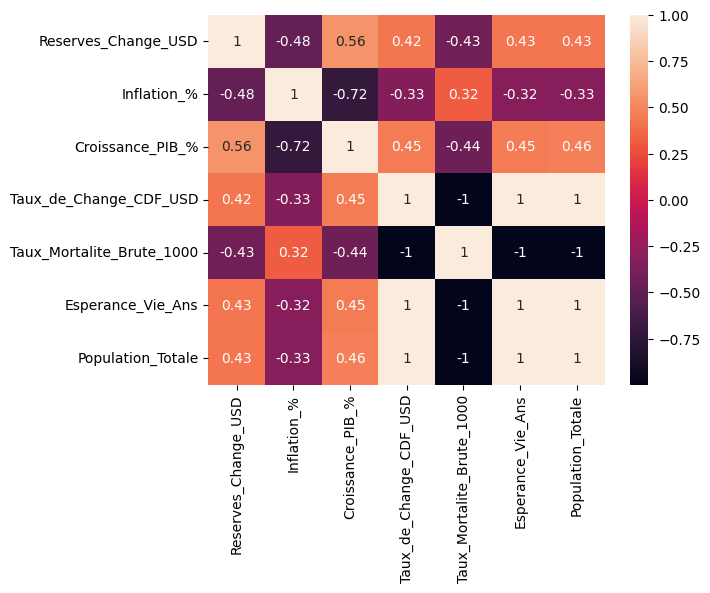

In [128]:
sn.heatmap(df.corr(method='spearman'),annot=True)

In [129]:
def plot_histogram_boxplot_plotly(df, col):
    """
    Affiche l'histogramme et le boxplot côte à côte pour une variable donnée
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Le dataframe contenant les données
    col : str
        Le nom de la colonne à visualiser
    """
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=(f"Histogramme de {col}", f"Boxplot de {col}"),
        specs=[[{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    # Ajouter l'histogramme
    fig.add_trace(
        go.Histogram(
            x=df[col],
            name=col,
            nbinsx=30,
            marker_color='lightblue',
            showlegend=False,
            opacity=0.7
        ),
        row=1, col=1
    )
    
    # Ajouter le boxplot
    fig.add_trace(
        go.Box(
            y=df[col],
            name=col,
            marker_color='salmon',
            showlegend=False,
            boxmean='sd'
        ),
        row=1, col=2
    )
    
    # Mettre à jour les étiquettes des axes
    fig.update_xaxes(title_text="Valeurs", row=1, col=1)
    fig.update_yaxes(title_text="Fréquence", row=1, col=1)
    fig.update_yaxes(title_text="Valeurs", row=1, col=2)
    
    # Mettre à jour la mise en page
    fig.update_layout(
        height=500,
        width=1000,
        title_text=f"Analyse de distribution : {col}",
        showlegend=False,
        hovermode='x unified'
    )
    
    fig.show()


# Afficher les graphiques pour toutes les variables
for col in df.columns:
    plot_histogram_boxplot_plotly(df, col)

In [130]:
df.index=pd.to_datetime(df.index,format="%Y")

ANALYSE DE CAUSALITE SUR  DES INDICATEURS MACROECONOMIQUES

In [131]:
def plot_time_series_plotly(df):
    """
    Affiche les courbes (line plots) de toutes les variables du dataframe côte à côte
    en utilisant l'index (années) en abscisse.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Le dataframe avec l'index 'annee' et les variables en colonnes
    """
    n_cols = len(df.columns)
    
    # Calculer le nombre de lignes et colonnes pour la grille
    # 2 colonnes par ligne pour afficher côte à côte
    n_rows = (n_cols + 1) // 2
    n_cols_grid = 2
    
    # Créer les specs pour les subplots
    specs = [[{"secondary_y": False}, {"secondary_y": False}] for _ in range(n_rows)]
    
    fig = make_subplots(
        rows=n_rows, cols=n_cols_grid,
        subplot_titles=[col for col in df.columns] + [''] * (n_rows * 2 - n_cols),
        specs=specs,
        vertical_spacing=0.12,
        horizontal_spacing=0.12
    )
    
    # Ajouter les courbes
    colors = pl.colors.qualitative.Plotly
    
    for idx, col in enumerate(df.columns):
        row = idx // 2 + 1
        col_pos = idx % 2 + 1
        color = colors[idx % len(colors)]
        
        fig.add_trace(
            go.Scatter(
                x=df.index,
                y=df[col],
                mode='lines+markers',
                name=col,
                line=dict(color=color, width=2),
                marker=dict(size=6),
                hovertemplate=f"<b>{col}</b><br>Année: %{{x}}<br>Valeur: %{{y:.2f}}<extra></extra>"
            ),
            row=row, col=col_pos
        )
        
        # Mettre à jour les axes
        fig.update_xaxes(title_text="Année", row=row, col=col_pos)
        fig.update_yaxes(title_text=col, row=row, col=col_pos)
    
    # Mettre à jour la mise en page globale
    fig.update_layout(
        height=300 * n_rows,
        width=1400,
        title_text="Evolution des indicateurs macroéconomiques (RDC) - 1970 à 2024",
        showlegend=False,
        hovermode='x unified',
        font=dict(size=10)
    )
    
    fig.show()


# Afficher les graphiques pour toutes les variables
print("Génération des courbes temporelles pour toutes les variables...")
plot_time_series_plotly(df)

Génération des courbes temporelles pour toutes les variables...


Text(0.5, 1.0, 'evolution de reserve dechange entre 2018 et 2024')

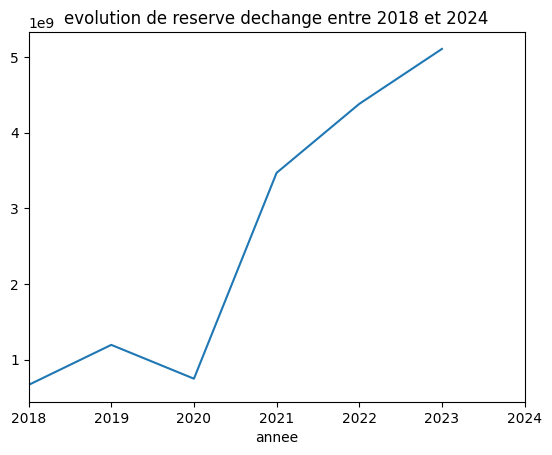

In [132]:
df.loc["2018-01-01":"2024-01-01","Reserves_Change_USD"].plot()
plt.title("evolution de reserve dechange entre 2018 et 2024")

In [133]:
df

,Reserves_Change_USD,Inflation_%,Croissance_PIB_%,Taux_de_Change_CDF_USD,Taux_Mortalite_Brute_1000,Esperance_Vie_Ans,Population_Totale
annee,,,,,,,
1970-01-01,1.892522e+08,8.025284,-0.245057,1.670000e-12,21.085,43.300,20137436.0
1971-01-01,1.536534e+08,5.777350,6.005018,1.670000e-12,20.853,43.578,20695569.0
1972-01-01,2.175487e+08,15.804215,0.151136,1.670000e-12,20.583,43.869,21251160.0
1973-01-01,3.371270e+08,15.642762,8.137276,1.670000e-12,20.358,44.090,21827665.0
1974-01-01,2.120460e+08,29.469281,3.130586,1.670000e-12,20.140,44.311,22418878.0
1975-01-01,8.437135e+07,28.657970,-4.981631,1.670000e-12,19.924,44.530,23021101.0
1976-01-01,8.531063e+07,80.385959,-5.309002,2.640833e-12,19.761,44.695,23624031.0
1977-01-01,1.767534e+08,68.947708,0.760794,2.855000e-12,19.581,44.866,24229061.0
1978-01-01,1.953573e+08,48.769038,-5.345292,2.786667e-12,19.574,44.628,24992689.0


In [134]:
df.drop("Inflation_%",axis=1,inplace=True)

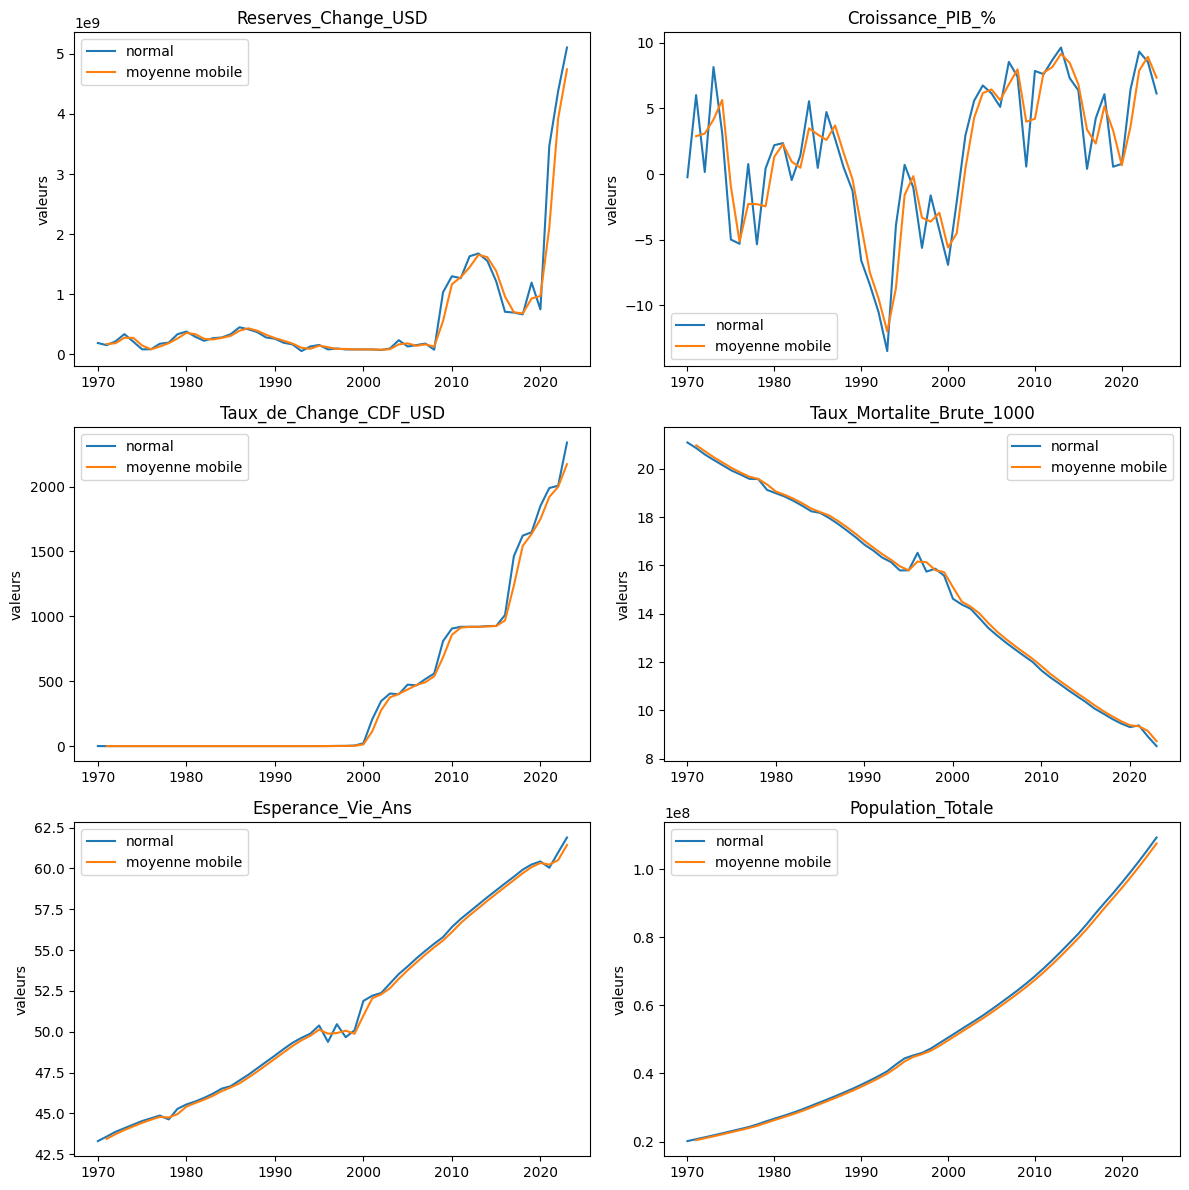

In [135]:
plt.figure(figsize=(12,12))
for i,col in enumerate(df) : 
   plt.subplot(3,2,i+1) 
   plt.plot(df[col],label="normal")
   plt.plot(df[col].rolling(2).mean(),label="moyenne mobile")
   plt.title(col)
   plt.legend()
   plt.ylabel("valeurs")
   plt.tight_layout()
    


In [136]:
df["taux de reserve"]=df["Reserves_Change_USD"].pct_change()*100

C:\Users\lauredie\AppData\Local\Temp\ipykernel_8692\196107656.py:1: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



<Axes: xlabel='annee'>

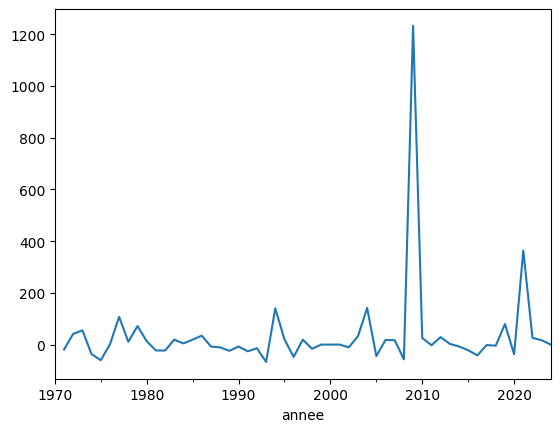

In [137]:

df["taux de reserve"].plot()

ANALYSE  predictive

In [138]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.api import  ARIMA,SARIMAX,VAR,VECM
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose


In [139]:
def adf_production(series,regression='c',alpha=0.05):
    result = adfuller(series, regression=regression)
    
    return {
        "adf_stat": result[0],
        "p_value": result[1],
        "lags": result[2],
        "stationary": "la serie est stationnaire" if result[1] < alpha else "la serie n est pas staionnaire"
    }

In [140]:
adf_production(po)

{'adf_stat': np.float64(-3.7438440443667758),
 'p_value': np.float64(0.003537050720519998),
 'lags': 3,
 'stationary': 'la serie est stationnaire'}

In [141]:
def graphique(dfs) :
   
    fig ,(ax1,ax2) =plt.subplots(1,2,figsize=(12,4))
    plot_acf(x=dfs,lags=36,ax=ax1)
    ax1.set_title(f"grap acf")
    plot_pacf(x=dfs,lags=12,ax=ax2)
    ax2.set_title(f"grap pacf")
    seasonal_decompose(dfs).plot()
    
                  
    
     
